In [ ]:
!pip install statsbombpy
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns


#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
a  = free_comps[free_comps['competition_name']=='Ligue 1']
a = a[a["season_id"]!=27]
a

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
58,7,235,France,Ligue 1,male,False,False,2022/2023,2024-06-11T00:50:53.277411,2024-06-26T08:17:36.043856,2024-06-26T08:17:36.043856,2024-06-11T00:50:53.277411
59,7,108,France,Ligue 1,male,False,False,2021/2022,2024-06-03T16:46:00.665854,2024-06-03T16:49:55.355195,2024-06-03T16:49:55.355195,2024-06-03T16:46:00.665854


In [ ]:
free_comps = sb.competitions()
free_comps[(free_comps["competition_name"]=="Premier League") & (free_comps["season_id"]==27)]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851


In [ ]:
leiscester_pl = sb.matches(competition_id=2, season_id=27)
leiscester_pl

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [ ]:
events_df = sb.events(match_id=3754141) # Arsenal VS West Ham
events_df

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Arsenal,1,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",West Ham United,40,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:24:05.973,Injury Stoppage,NaN
3560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:29:07.702,Injury Stoppage,NaN
3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:29:08.132,Injury Stoppage,NaN
3562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:24:52.579,Player Off,NaN


Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_outcome',
       'dribble_overrun', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
  

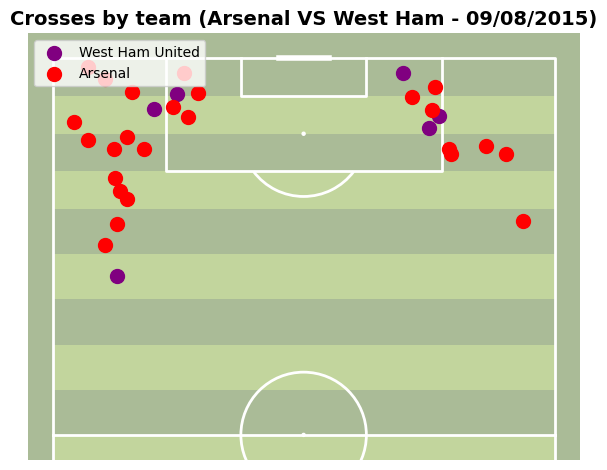

In [ ]:
print(events_df.columns)

# Assign colors for Arsenal and West Ham
team_colors = {
    'Arsenal': 'red',
    'West Ham United': 'purple'
}

# Filter for passes identified as crosses
pass_crosses = events_df[events_df['pass_cross'].notna()]

# Initialize the pitch
pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True, half=True)
fig, ax = pitch.draw()

# Plot crosses for each team
teams = pass_crosses['team'].unique()
for team in teams:
    if team in team_colors:
        color = team_colors[team]  # Use the assigned color
    else:
        color = 'gray'  # Default color if team isn't specified

    # Filter the data for the current team
    team_crosses = pass_crosses[pass_crosses['team'] == team]
    pass_start_locations = team_crosses['location'].dropna()

    for loc in pass_start_locations:
        if isinstance(loc, list) and len(loc) == 2:
            pitch.scatter(loc[0], loc[1], ax=ax, color=color, label=team, s=100)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=10)
plt.title('Crosses by team (Arsenal VS West Ham - 09/08/2015)', fontsize=14, fontweight="bold")
plt.show()


In [ ]:
for team in events_df["team"].unique():
  a = events_df[events_df["team"]==team]
  print(f"{team}: {round(a['shot_statsbomb_xg'].sum(), 2)}xG")

Arsenal: 1.29xG
West Ham United: 0.43xG


Damn... Arsenal lost 2-0

Looking at the number of crosses is also pretty impressive. West Ham only had 6 vs Arsenal's 20+

Thats an impressive underperformance of **-1.29** versus a WestHam being much more convincing at a **+1.57** realized vs expected goals


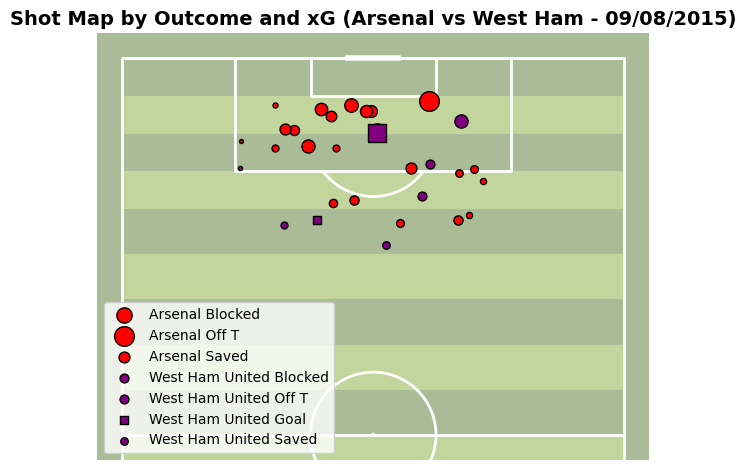

In [ ]:
# Define colors for Arsenal and West Ham
team_colors = {
    'Arsenal': 'red',
    'West Ham United': 'purple'
}

# Filter for shots
shots = events_df[events_df['type'] == 'Shot']

# Initialize the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white',
                      stripe_color='#c2d59d', stripe=True, half=True)
fig, ax = pitch.draw()

# Plot shots for each team
for team, color in team_colors.items():
    team_shots = shots[shots['team'] == team]
    for _, shot in team_shots.iterrows():
        loc = shot['location']
        xg = shot['shot_statsbomb_xg']
        shot_outcome = shot['shot_outcome']

        # Determine marker based on shot outcome
        if shot_outcome == 'Goal':
            marker = 's'  # Square for goals
        elif shot_outcome == 'On Target':
            marker = '^'  # Triangle for on-target
        else:
            marker = 'o'  # Circle for off-target

        if isinstance(loc, list) and len(loc) == 2:
            pitch.scatter(loc[0], loc[1], ax=ax, color=color, edgecolor='black',
                          s=xg * 1000, label=f'{team} {shot_outcome}', marker=marker)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='lower left', fontsize=10)
plt.title('Shot Map by Outcome and xG (Arsenal vs West Ham - 09/08/2015)', fontsize=14, fontweight="bold")
plt.show()
